In [102]:
import pandas as pd
import numpy as np

In [103]:
data=pd.read_csv("train.csv")

In [104]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [105]:
data['Date']=pd.to_datetime(data['Dates']).dt.date
data['Time']=pd.to_datetime(data['Dates']).dt.time
data['Hour']=pd.to_datetime(data['Dates']).dt.hour
data['Month']=pd.to_datetime(data['Date']).dt.month
data['Day_of_month']=pd.to_datetime(data['Date']).dt.day

In [ ]:
from math import radians, cos, sin, asin, sqrt,atan2
import math
def distance(lat1, lng1, lat2, lng2):
    #return distance as meter if you want km distance, remove "* 1000"
    radius = 6371 

    dLat = (lat2-lat1) * math.pi / 180
    dLng = (lng2-lng1) * math.pi / 180

    lat1 = lat1 * math.pi / 180
    lat2 = lat2 * math.pi / 180

    val = sin(dLat/2) * sin(dLat/2) + sin(dLng/2) * sin(dLng/2) * cos(lat1) * cos(lat2)    
    ang = 2 * atan2(sqrt(val), sqrt(1-val))
    return radius * ang

In [ ]:
lat=data[['X','Y']]

In [ ]:
dist=[]
for x,y in np.array(lat):
    dist.append(distance(37.7749,-122.4194,y,x))

In [ ]:
data['Distance']=dist

In [ ]:
data.drop(['X','Y'],axis=1,inplace=True)

In [106]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Date,Time,Hour,Month,Day_of_month
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,23:53:00,23,5,13
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,23:53:00,23,5,13
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13,23:33:00,23,5,13
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13,23:30:00,23,5,13
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13,23:30:00,23,5,13


In [107]:
data.drop(['Descript','Resolution','Dates'],axis=1,inplace=True)

In [67]:
data.head()

,Category,DayOfWeek,PdDistrict,Address,X,Y,Date,Time,Hour,Month,Day_of_month
0,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,23:53:00,23,5,13
1,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,23:53:00,23,5,13
2,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13,23:33:00,23,5,13
3,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13,23:30:00,23,5,13
4,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13,23:30:00,23,5,13


In [108]:
address=data.Address
address=list(address)

In [109]:
store=[]
for x in address:
    store.append(x.split())

In [110]:
store

[['OAK', 'ST', '/', 'LAGUNA', 'ST'],
 ['OAK', 'ST', '/', 'LAGUNA', 'ST'],
 ['VANNESS', 'AV', '/', 'GREENWICH', 'ST'],
 ['1500', 'Block', 'of', 'LOMBARD', 'ST'],
 ['100', 'Block', 'of', 'BRODERICK', 'ST'],
 ['0', 'Block', 'of', 'TEDDY', 'AV'],
 ['AVALON', 'AV', '/', 'PERU', 'AV'],
 ['KIRKWOOD', 'AV', '/', 'DONAHUE', 'ST'],
 ['600', 'Block', 'of', '47TH', 'AV'],
 ['JEFFERSON', 'ST', '/', 'LEAVENWORTH', 'ST'],
 ['JEFFERSON', 'ST', '/', 'LEAVENWORTH', 'ST'],
 ['0', 'Block', 'of', 'ESCOLTA', 'WY'],
 ['TURK', 'ST', '/', 'JONES', 'ST'],
 ['FILLMORE', 'ST', '/', 'GEARY', 'BL'],
 ['200', 'Block', 'of', 'WILLIAMS', 'AV'],
 ['0', 'Block', 'of', 'MENDELL', 'ST'],
 ['EDDY', 'ST', '/', 'JONES', 'ST'],
 ['GODEUS', 'ST', '/', 'MISSION', 'ST'],
 ['MENDELL', 'ST', '/', 'HUDSON', 'AV'],
 ['100', 'Block', 'of', 'JONES', 'ST'],
 ['200', 'Block', 'of', 'EVELYN', 'WY'],
 ['1600', 'Block', 'of', 'VALENCIA', 'ST'],
 ['100', 'Block', 'of', 'JONES', 'ST'],
 ['100', 'Block', 'of', 'JONES', 'ST'],
 ['FILLMORE', 'S

In [111]:
add=[]
for x in store:
    if len(x)>4:
        add.append(x[3])
    else:
        add.append(x[0])

In [112]:
data['Address_area']=add

In [113]:
data.head()

,Category,DayOfWeek,PdDistrict,Address,X,Y,Date,Time,Hour,Month,Day_of_month,Address_area
0,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,23:53:00,23,5,13,LAGUNA
1,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,23:53:00,23,5,13,LAGUNA
2,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13,23:33:00,23,5,13,GREENWICH
3,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13,23:30:00,23,5,13,LOMBARD
4,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13,23:30:00,23,5,13,BRODERICK


In [114]:
data.drop(['Address','Date','Time'],axis=1,inplace=True)

In [115]:
data.head()

,Category,DayOfWeek,PdDistrict,X,Y,Hour,Month,Day_of_month,Address_area
0,WARRANTS,Wednesday,NORTHERN,-122.425892,37.774599,23,5,13,LAGUNA
1,OTHER OFFENSES,Wednesday,NORTHERN,-122.425892,37.774599,23,5,13,LAGUNA
2,OTHER OFFENSES,Wednesday,NORTHERN,-122.424363,37.800414,23,5,13,GREENWICH
3,LARCENY/THEFT,Wednesday,NORTHERN,-122.426995,37.800873,23,5,13,LOMBARD
4,LARCENY/THEFT,Wednesday,PARK,-122.438738,37.771541,23,5,13,BRODERICK


In [116]:
cat_data=data.select_dtypes(exclude=('int64','float64'))
cat_data.head()

,Category,DayOfWeek,PdDistrict,Address_area
0,WARRANTS,Wednesday,NORTHERN,LAGUNA
1,OTHER OFFENSES,Wednesday,NORTHERN,LAGUNA
2,OTHER OFFENSES,Wednesday,NORTHERN,GREENWICH
3,LARCENY/THEFT,Wednesday,NORTHERN,LOMBARD
4,LARCENY/THEFT,Wednesday,PARK,BRODERICK


In [117]:
num_data=data.select_dtypes(include=('int64','float64'))
num_data.head()

,X,Y,Hour,Month,Day_of_month
0,-122.425892,37.774599,23,5,13
1,-122.425892,37.774599,23,5,13
2,-122.424363,37.800414,23,5,13
3,-122.426995,37.800873,23,5,13
4,-122.438738,37.771541,23,5,13


In [118]:
from sklearn import preprocessing as p
le=p.LabelEncoder()

In [119]:
for x in cat_data.columns:
    cat_data[x]=le.fit_transform(cat_data[x])

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [120]:
data1=pd.concat([num_data,cat_data],axis=1)

In [121]:
data1.Category.value_counts()

16    174900
21    126182
20     92304
1      76876
7      53971
36     53781
35     44725
37     42214
4      36755
32     31414
19     25989
25     23000
13     16679
12     10609
27      9985
38      8555
23      7484
34      7326
30      4540
28      4388
5       4320
8       4280
24      3138
15      2341
6       2268
26      1946
17      1903
0       1513
18      1225
9       1166
31       508
11       491
2        406
3        289
10       256
29       148
14       146
22        22
33         6
Name: Category, dtype: int64

In [122]:
data2=data1[data1.Category == 16]

In [123]:
data3=data1[data1.Category == 21]

In [124]:
dat=pd.concat([data2,data3],axis=0)

In [125]:
dat.Category.unique()

array([16, 21], dtype=int64)

In [126]:
import seaborn as sns

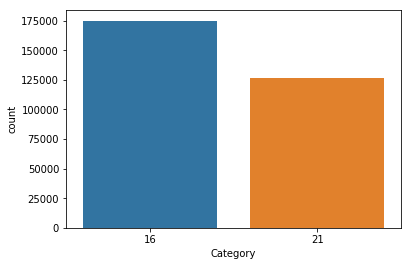

In [127]:
sns.countplot(data=dat,x='Category')

In [128]:
X=dat.drop('Category',axis=1)

In [129]:
Y=dat.Category

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [132]:
from sklearn.neural_network import MLPClassifier

In [133]:
clf = MLPClassifier(hidden_layer_sizes=(5),activation='relu',solver='adam',max_iter=100)

In [135]:
clf.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=5, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [136]:
predicted=clf.predict(x_test)
predicted

array([21, 16, 16, ..., 16, 21, 16], dtype=int64)

In [137]:
print(clf.score(x_train,y_train))

0.5854233699375169


In [138]:
print(clf.score(x_test,y_test))

0.5834066791769766
